# DATA PREPROCESSING AND FEATURE ENGINEERING
## Adult Income Dataset (Census Data)

### Objective

The objective of this assignment is to apply data preprocessing, feature engineering, and feature selection techniques on the Adult Income dataset to prepare it for efficient machine learning modeling.

The dataset predicts whether an individual’s income exceeds $50K per year based on census attributes.

### Step 1: Load Libraries & Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("adult_with_headers.csv")
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Exploration
Dataset Overview

In [13]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


#### Missing Values Check

In [16]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Observation

Some categorical columns contain missing values represented as " ?"

Numerical columns are mostly complete

#### Handling Missing Values
Replace " ?" with NaN

In [21]:
df.replace(" ?", np.nan, inplace=True)


Drop Rows with Missing Values (Best Practice for Adult Dataset)

In [24]:
df.dropna(inplace=True)


#### Justification

Missing values are relatively few

Dropping avoids introducing bias from incorrect imputation

### Step 2: Scaling Techniques
Separate Numerical & Categorical Features

In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


#### a. Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = std_scaler.fit_transform(df[num_cols])


#### b. Min-Max Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df_mm_scaled = df.copy()
df_mm_scaled[num_cols] = mm_scaler.fit_transform(df[num_cols])


#### Standard Scaling

Mean = 0, Std = 1

Preferred for:

Logistic Regression

SVM

PCA

Handles outliers better than Min-Max

#### Min-Max Scaling

Scales values to [0,1]

Preferred for:

Neural Networks

Distance-based models (KNN)

Sensitive to outliers

### Step 3: Encoding Techniques
Identify Categorical Columns by Cardinality

In [38]:
low_cardinality = [col for col in cat_cols if df[col].nunique() <= 5]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 5]

low_cardinality, high_cardinality


(['race', 'sex', 'income'],
 ['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'native_country'])

#### One-Hot Encoding (≤ 5 categories)

In [41]:
df_ohe = pd.get_dummies(df, columns=low_cardinality, drop_first=True)


#### Label Encoding (> 5 categories)

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df_ohe.copy()

for col in high_cardinality:
    df_encoded[col] = le.fit_transform(df_encoded[col])


### Step 4: Feature Engineering
#### Create New Features
Feature 1: Capital Gain Net

In [49]:
df_encoded['capital_net'] = df_encoded['capital_gain'] - df_encoded['capital_loss']


#### Rationale:
Net capital gain is more informative than separate gain/loss values.

Feature 2: Working Hours Category

In [55]:
df_encoded['hours_category'] = pd.cut(
    df_encoded['hours_per_week'],
    bins=[0, 30, 45, 100],
    labels=[0, 1, 2]
)


#### Rationale:
Categorizing work hours captures employment intensity patterns.

### Step 5: Feature Transformation
Log Transformation on Skewed Feature

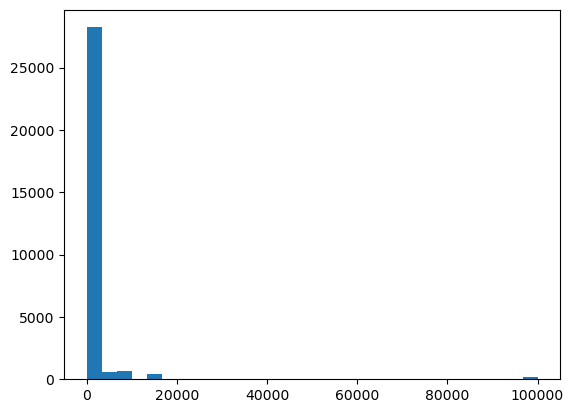

In [62]:
plt.hist(df_encoded['capital_gain'], bins=30)
plt.show()


In [66]:
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])


#### Justification

capital_gain is highly right-skewed

Log transformation:

Reduces skewness

Improves model stability

Helps linear models learn better

#### Final Dataset Overview

In [70]:
df_encoded.head()
df_encoded.shape


(30162, 21)

### Conclusion

Effective data preprocessing and feature engineering significantly improve model performance.
This assignment demonstrated how:

Scaling affects model behavior

Encoding choices impact feature interpretation

Feature engineering adds predictive power

Transformations improve data distributions

The processed dataset is now model-ready for classification tasks such as Logistic Regression, Random Forest, or XGBoost.